In [1]:
import torch
from numpy import loadtxt
from matplotlib import pyplot as plt
import NFdeconvolve

In [2]:
mu_a,sig_a = 10,1
shape,scale = 9,1

filename = 'N_{}_{}_G_{}_{}.csv'.format(mu_a,sig_a,shape,scale)
data = torch.tensor(loadtxt('paper_examples/datasets/'+filename)[:10000]).float()

In [3]:
a_distribution= torch.distributions.Normal(torch.tensor(mu_a),torch.tensor(sig_a))

In [4]:
model=NFdeconvolve.Deconvolver(data,a_distribution)

In [5]:
model.train()

  6%|▌         | 299/5000 [00:36<09:37,  8.14it/s]

Stopping early at iteration 300 due to small gradient norm: 0.027676332741975784


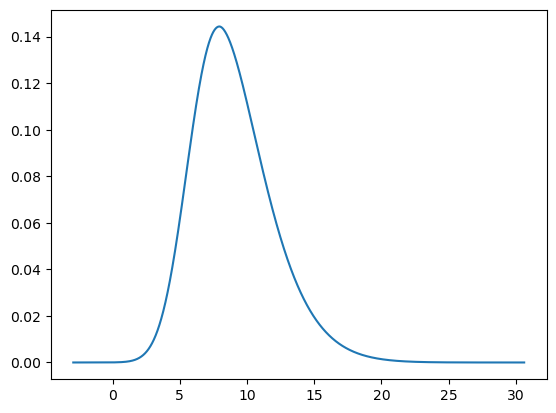

In [6]:
x,px = model.get_pdf()
plt.plot(x.cpu(),px.cpu())

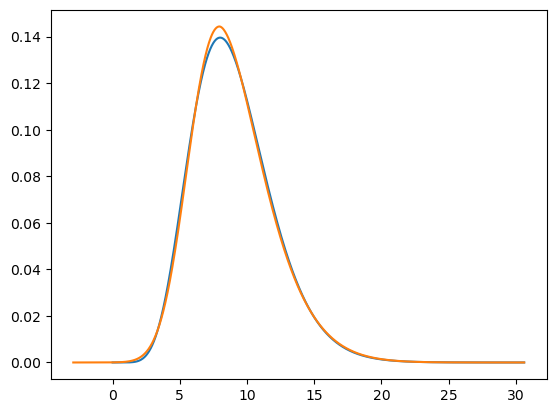

In [7]:
from paper_examples.basis import logprob_gamma
plt.plot(x.cpu(),torch.exp(logprob_gamma(x.cpu(),torch.tensor(shape),torch.tensor(scale))).cpu())
plt.plot(x.cpu(),px.cpu())